In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
df = pd.read_csv('Titanic_Train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644



2. MISSING VALUES ANALYSIS
------------------------------
Missing Values Summary:
          Missing_Count  Missing_Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


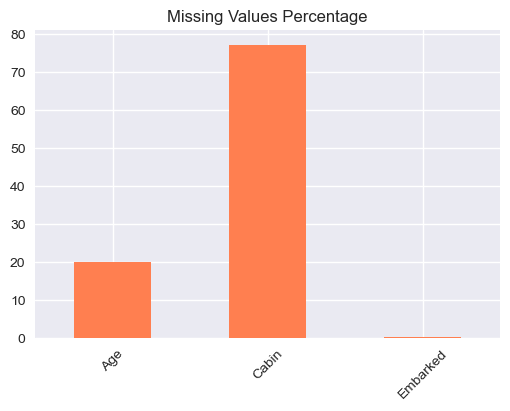

In [5]:
print("\n2. MISSING VALUES ANALYSIS")
print("-" * 30)

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualize missing values
plt.figure(figsize=(6, 4))

missing_percent[missing_percent > 0].plot(kind='bar', color='coral')
plt.title('Missing Values Percentage')
plt.xticks(rotation=45)

#plt.tight_layout()
plt.show()

In [48]:

# Handle missing values
print("Handling missing values...")

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with "Rare"
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Map similar titles
df['Title'] = df['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs'
})

# Impute Age by Title median
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))


# Cabin: Create a new feature for missing cabins
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Embarked: Fill with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("Missing values after cleaning:")
df.isnull().sum()

Handling missing values...
Missing values after cleaning:


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Has_Cabin          0
Title              0
Age_Group          0
Family_Size        0
Is_Alone           0
Fare_Per_Person    0
Deck               0
Fare_Bin           0
Survived_Label     0
dtype: int64

In [7]:
print("\n3. DUPLICATE VALUES ANALYSIS")
print("-" * 30)

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("Duplicate rows found:")
    print(df[df.duplicated()])
    # Remove duplicates if any
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")
else:
    print("No duplicate rows found.")


3. DUPLICATE VALUES ANALYSIS
------------------------------
Number of duplicate rows: 0
No duplicate rows found.


In [50]:
print("\n5. FEATURE ENGINEERING")
print("-" * 30)

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Family size
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)

# Fare per person
df['Fare_Per_Person'] = df['Fare'] / df['Family_Size']

# Deck from cabin
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].replace('T', 'Unknown')
print("New features created:")
new_features = ['Age_Group', 'Family_Size', 'Is_Alone', 'Fare_Per_Person', 'Has_Cabin', 'Deck']
for feature in new_features:
    print(f"- {feature}")
df.head()


5. FEATURE ENGINEERING
------------------------------
New features created:
- Age_Group
- Family_Size
- Is_Alone
- Fare_Per_Person
- Has_Cabin
- Deck


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Has_Cabin,Title,Age_Group,Family_Size,Is_Alone,Fare_Per_Person,Deck,Fare_Bin,Survived_Label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,1,Mr,Young Adult,2,0,3.62500,U,Very Low,Died
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,Mrs,Adult,2,0,35.64165,C,Very Low,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,1,Miss,Young Adult,1,1,7.92500,U,Very Low,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,Mrs,Young Adult,2,0,26.55000,C,Very Low,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,1,Mr,Young Adult,1,1,8.05000,U,Very Low,Died



QUESTION 1: What was the overall survival rate?
--------------------------------------------------
Overall survival rate: 38.38%


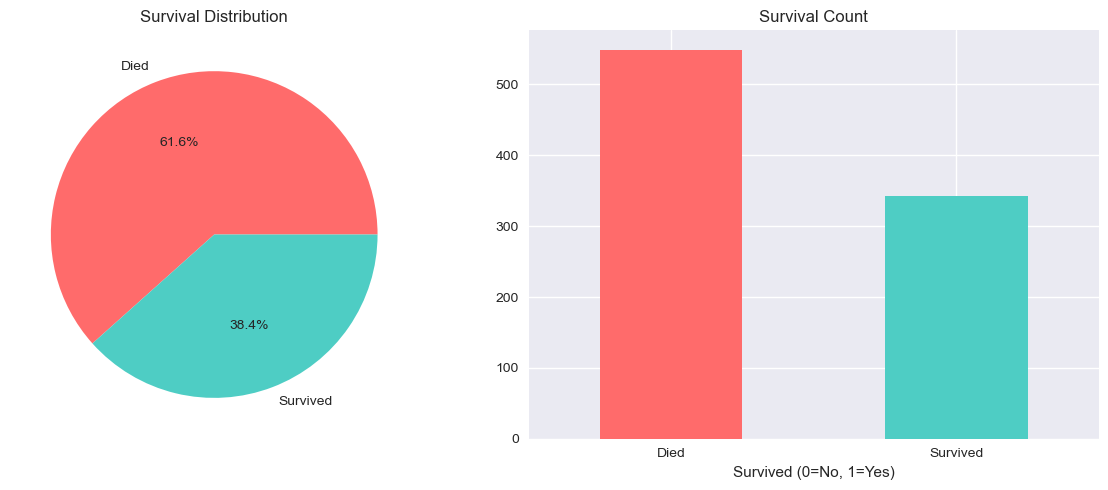

In [52]:
print("\nQUESTION 1: What was the overall survival rate?")
print("-" * 50)

survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Survival count
survival_counts = df['Survived'].value_counts()
ax1.pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%', 
        colors=['#ff6b6b', '#4ecdc4'])
ax1.set_title('Survival Distribution')

# Survival bar chart
survival_counts.plot(kind='bar', ax=ax2, color=['#ff6b6b', '#4ecdc4'])
ax2.set_title('Survival Count')
ax2.set_xlabel('Survived (0=No, 1=Yes)')
ax2.set_xticklabels(['Died', 'Survived'], rotation=0)

plt.tight_layout()
plt.show()


QUESTION 2: How did passenger class affect survival?
--------------------------------------------------
        Total  Survived  Survival_Rate
Pclass                                
1         216       136       0.629630
2         184        87       0.472826
3         491       119       0.242363


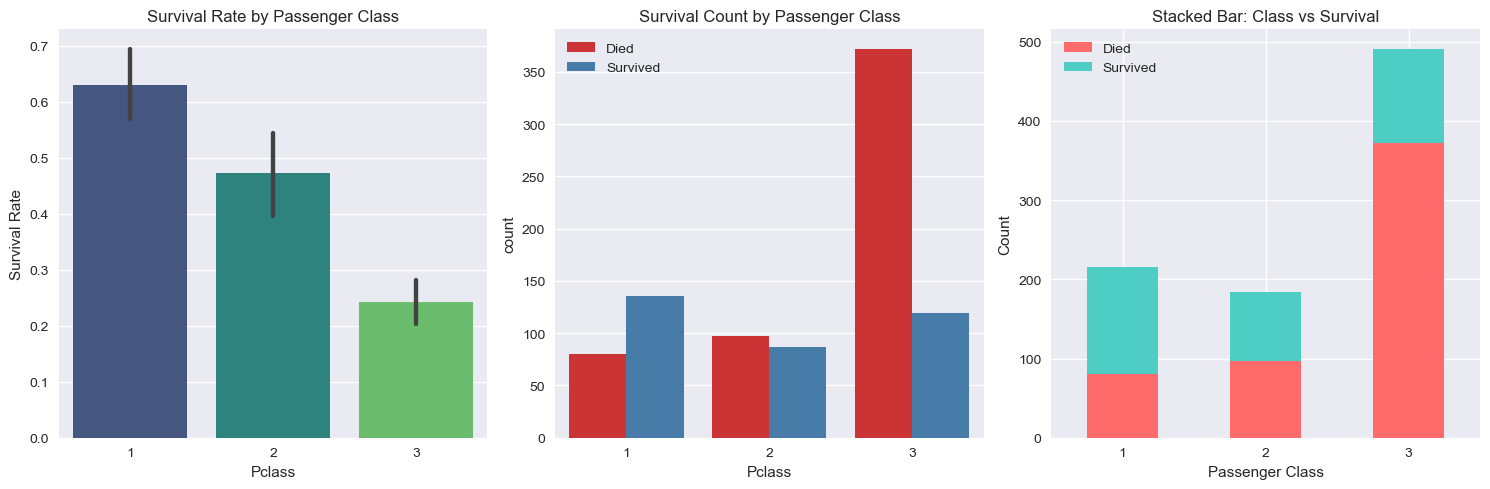

INSIGHT: First-class passengers had significantly higher survival rates!


In [10]:
# Question 2: How did passenger class affect survival?
print("\nQUESTION 2: How did passenger class affect survival?")
print("-" * 50)

class_survival = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(class_survival)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Pclass', y='Survived', palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.legend(['Died', 'Survived'])

plt.subplot(1, 3, 3)
# Plotly-style with matplotlib
class_counts = df.groupby(['Pclass', 'Survived']).size().unstack()
class_counts.plot(kind='bar', stacked=True, ax=plt.gca(), 
                  color=['#ff6b6b', '#4ecdc4'])
plt.title('Stacked Bar: Class vs Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("INSIGHT: First-class passengers had significantly higher survival rates!")


QUESTION 3: Did gender play a role in survival?
--------------------------------------------------
        Total  Survived  Survival_Rate
Sex                                   
female    314       233       0.742038
male      577       109       0.188908


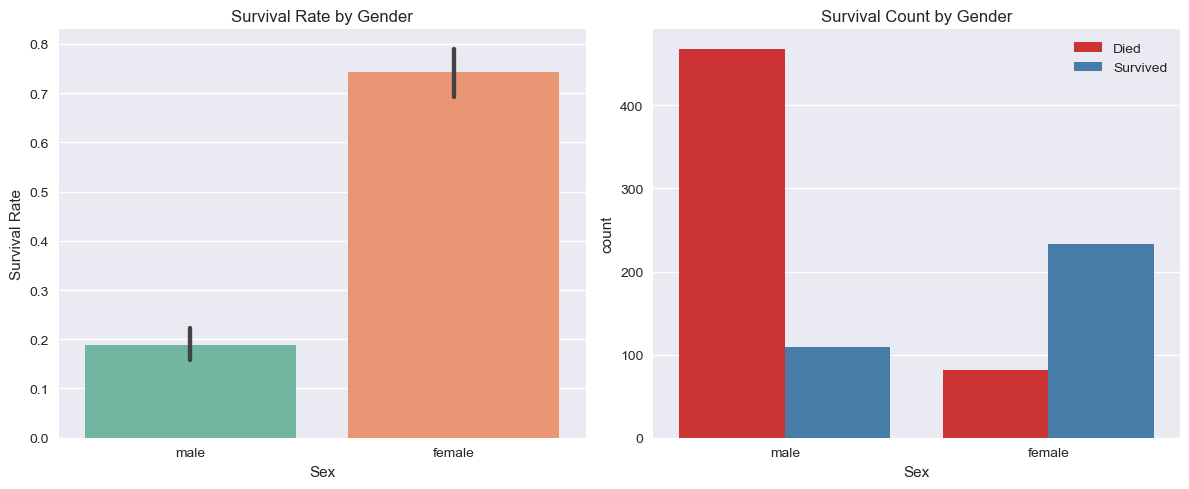

INSIGHT: Females had a much higher survival rate (Women and children first policy)


In [54]:
print("\nQUESTION 3: Did gender play a role in survival?")
print("-" * 50)

gender_survival = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
gender_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(gender_survival)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Sex', y='Survived', palette='Set2')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Count by Gender')
plt.legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

print("INSIGHT: Females had a much higher survival rate (Women and children first policy)")


QUESTION 4: How did age affect survival?
--------------------------------------------------


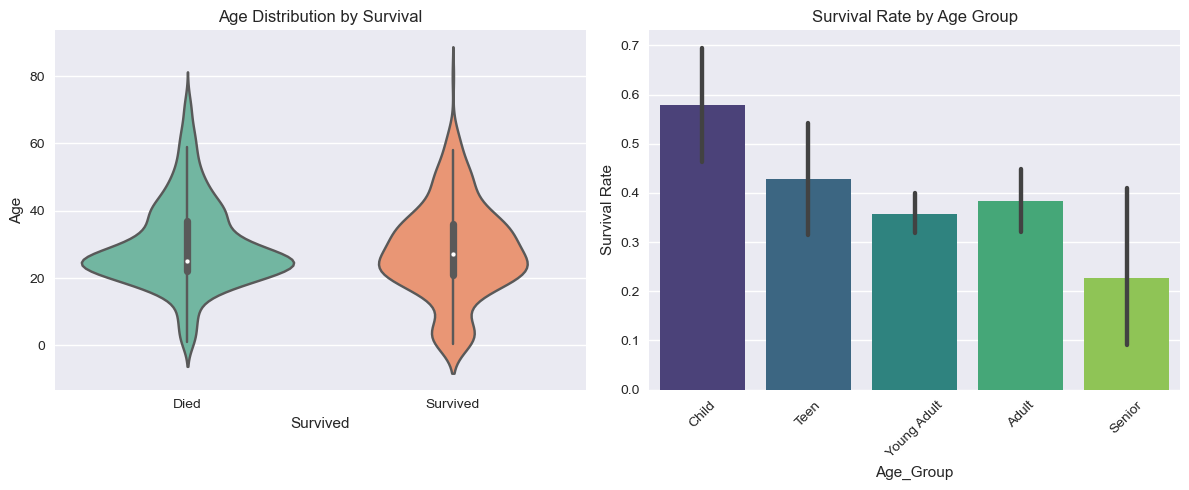

INSIGHT: Children had higher survival rates, consistent with 'women and children first'.


In [58]:
print("\nQUESTION 4: How did age affect survival?")
print("-" * 50)

plt.figure(figsize=(12, 5))

# Violin plot for Age distribution
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Survived', y='Age', palette='Set2')
plt.title('Age Distribution by Survival')
plt.xticks([0, 1], ['Died', 'Survived'])

# Barplot for Age Group survival rate
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Age_Group', y='Survived', palette='viridis')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("INSIGHT: Children had higher survival rates, consistent with 'women and children first'.")



QUESTION 5: How did family size impact survival?
--------------------------------------------------
             count      mean
Family_Size                 
1              537  0.303538
2              161  0.552795
3              102  0.578431
4               29  0.724138
5               15  0.200000
6               22  0.136364
7               12  0.333333
8                6  0.000000
11               7  0.000000


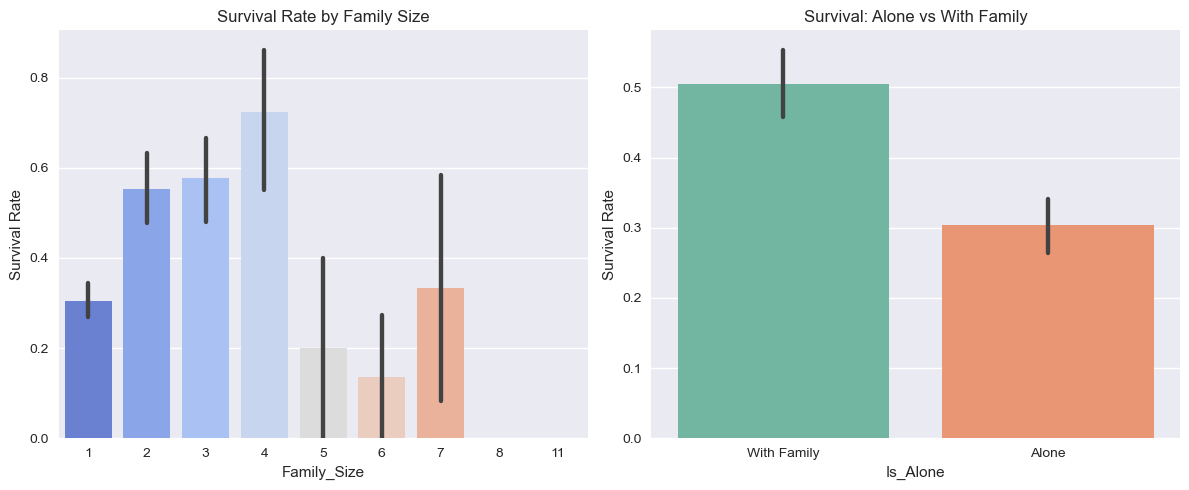

INSIGHT: Medium-sized families (2–4 people) had higher survival, while being alone or in large families reduced survival chances.


In [60]:
print("\nQUESTION 5: How did family size impact survival?")
print("-" * 50)

# Family size summary
family_survival = df.groupby('Family_Size')['Survived'].agg(['count', 'mean'])
print(family_survival)

plt.figure(figsize=(12, 5))

# 1. Survival rate by Family Size
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Family_Size', y='Survived', palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')

# 2. Survival: Alone vs With Family
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Is_Alone', y='Survived', palette='Set2')
plt.title('Survival: Alone vs With Family')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

print("INSIGHT: Medium-sized families (2–4 people) had higher survival, while being alone or in large families reduced survival chances.")



QUESTION 6: How did fare correlate with survival?
--------------------------------------------------


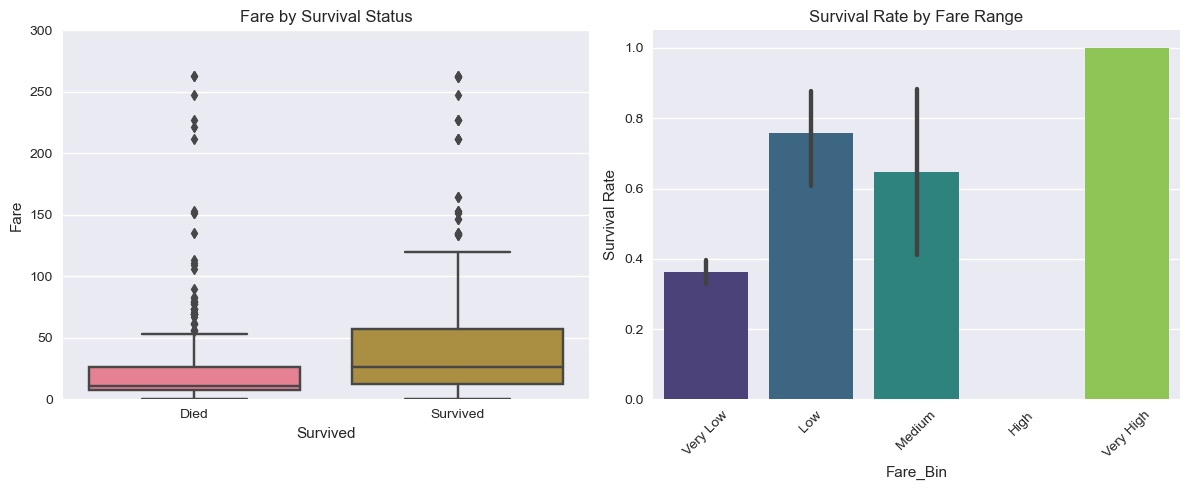

INSIGHT: Higher fares → higher survival, reflecting class differences (1st class tickets cost more).


In [64]:
print("\nQUESTION 6: How did fare correlate with survival?")
print("-" * 50)
plt.figure(figsize=(12, 5))

# 1. Boxplot by Survival (already clear)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare by Survival Status')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.ylim(0, 300)

# 2. Survival Rate by Fare Bin
df['Fare_Bin'] = pd.cut(df['Fare'], bins=5, labels=['Very Low','Low','Medium','High','Very High'])
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Fare_Bin', y='Survived', palette='viridis')
plt.title('Survival Rate by Fare Range')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("INSIGHT: Higher fares → higher survival, reflecting class differences (1st class tickets cost more).")


QUESTION 7: How did embarkation port affect survival?
--------------------------------------------------
          Total  Survived  Survival_Rate
Embarked                                
C           168        93       0.553571
Q            77        30       0.389610
S           646       219       0.339009


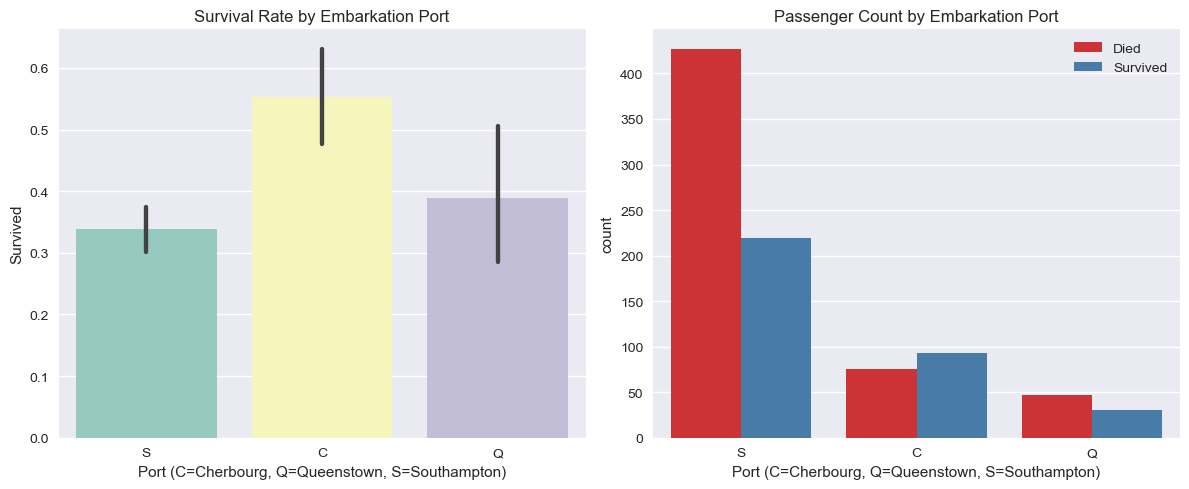

INSIGHT: Passengers from Cherbourg had the highest survival rate


In [66]:
print("\nQUESTION 7: How did embarkation port affect survival?")
print("-" * 50)

embark_survival = df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean'])
embark_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(embark_survival)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Embarked', y='Survived', palette='Set3')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set1')
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

print("INSIGHT: Passengers from Cherbourg had the highest survival rate")


QUESTION 8: How did passenger titles affect survival?
--------------------------------------------------
         Total  Survived  Survival_Rate
Title                                  
Master      40        23       0.575000
Miss       185       130       0.702703
Mr         517        81       0.156673
Mrs        128       102       0.796875
Officer     21         6       0.285714


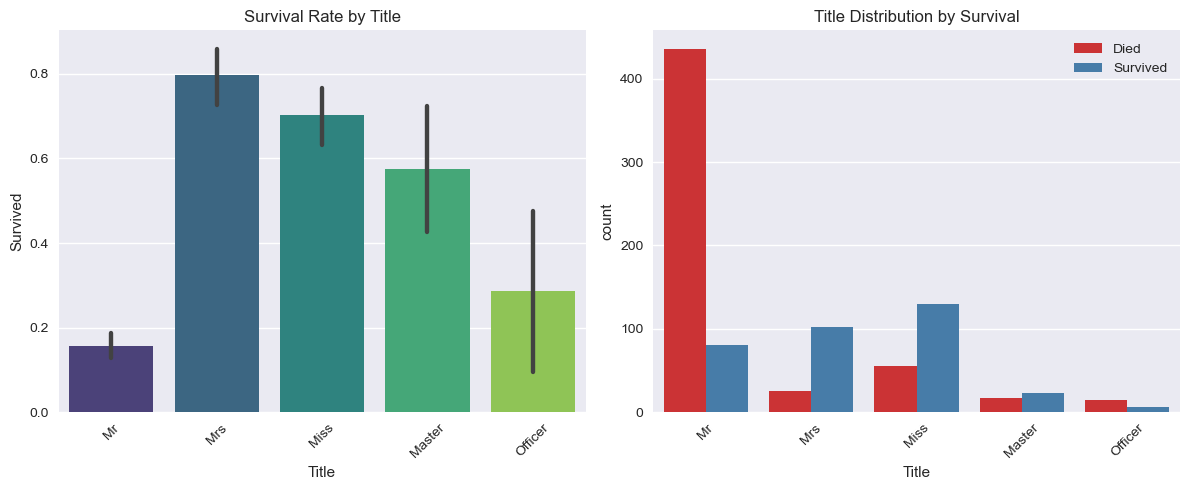

INSIGHT: Mrs, Miss, and Master had higher survival rates


In [16]:
print("\nQUESTION 8: How did passenger titles affect survival?")
print("-" * 50)

title_survival = df.groupby('Title')['Survived'].agg(['count', 'sum', 'mean'])
title_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(title_survival)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Title', y='Survived', palette='viridis')
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Title', hue='Survived', palette='Set1')
plt.title('Title Distribution by Survival')
plt.xticks(rotation=45)
plt.legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

print("INSIGHT: Mrs, Miss, and Master had higher survival rates")


QUESTION 9: Combined analysis - How did class, gender, and age interact?
--------------------------------------------------


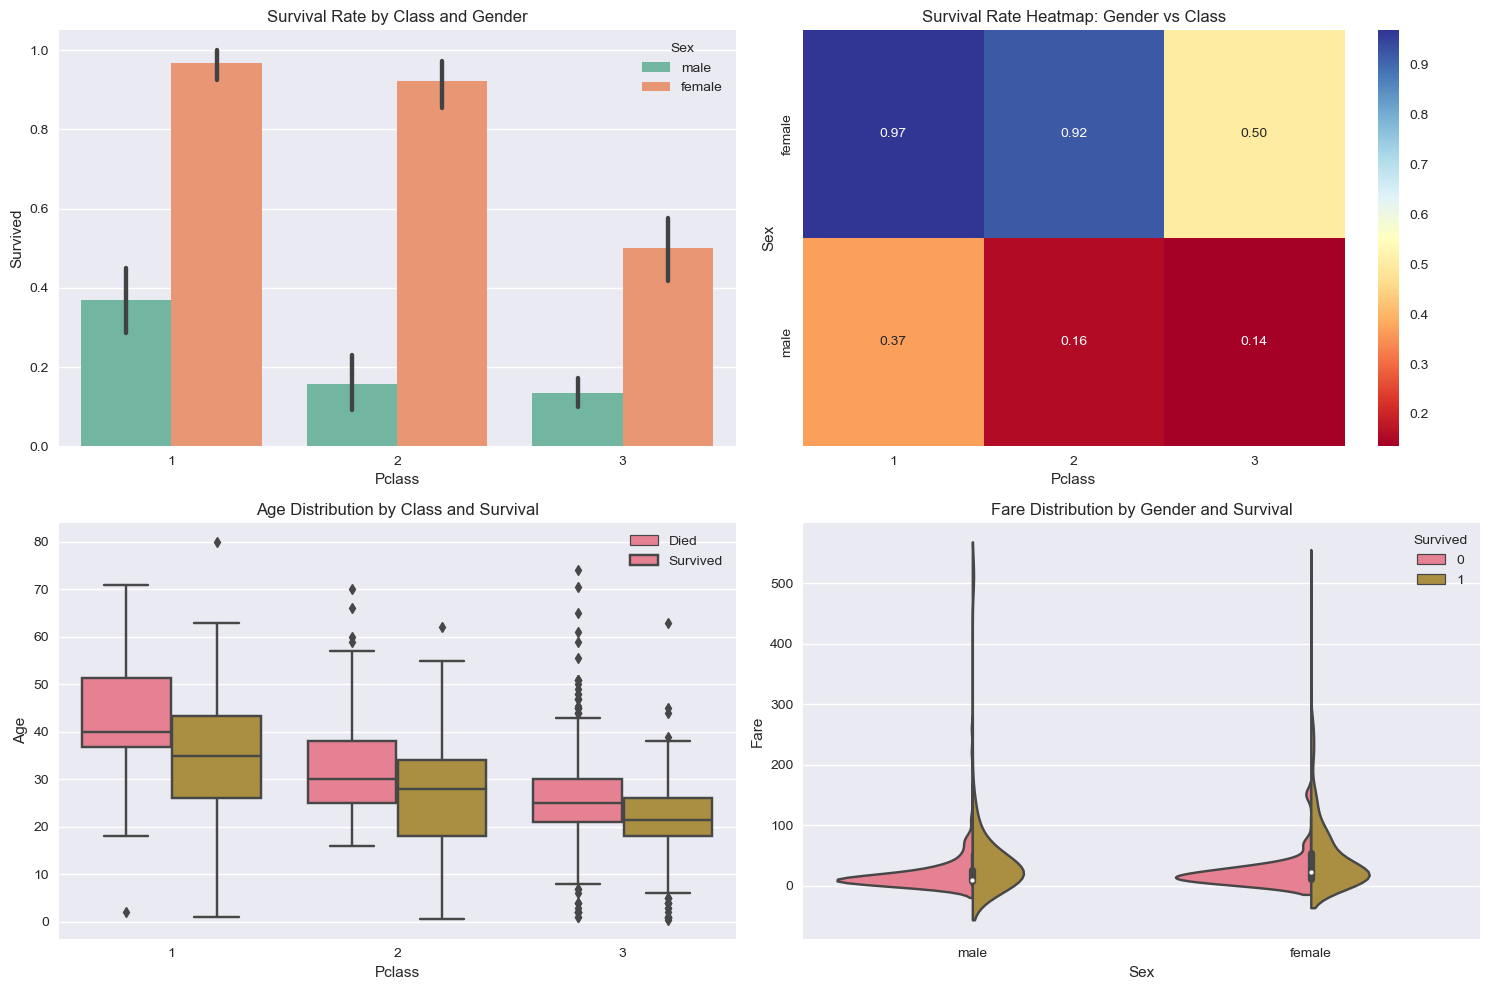

INSIGHT: First-class women had the highest survival rate, third-class men had the lowest


In [68]:
print("\nQUESTION 9: Combined analysis - How did class, gender, and age interact?")
print("-" * 50)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', palette='Set2')
plt.title('Survival Rate by Class and Gender')

plt.subplot(2, 2, 2)
survival_pivot = df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
sns.heatmap(survival_pivot, annot=True, cmap='RdYlBu', fmt='.2f')
plt.title('Survival Rate Heatmap: Gender vs Class')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Pclass', y='Age', hue='Survived')
plt.title('Age Distribution by Class and Survival')
plt.legend(['Died', 'Survived'])

plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='Sex', y='Fare', hue='Survived', split=True)
plt.title('Fare Distribution by Gender and Survival')

plt.tight_layout()
plt.show()

print("INSIGHT: First-class women had the highest survival rate, third-class men had the lowest")

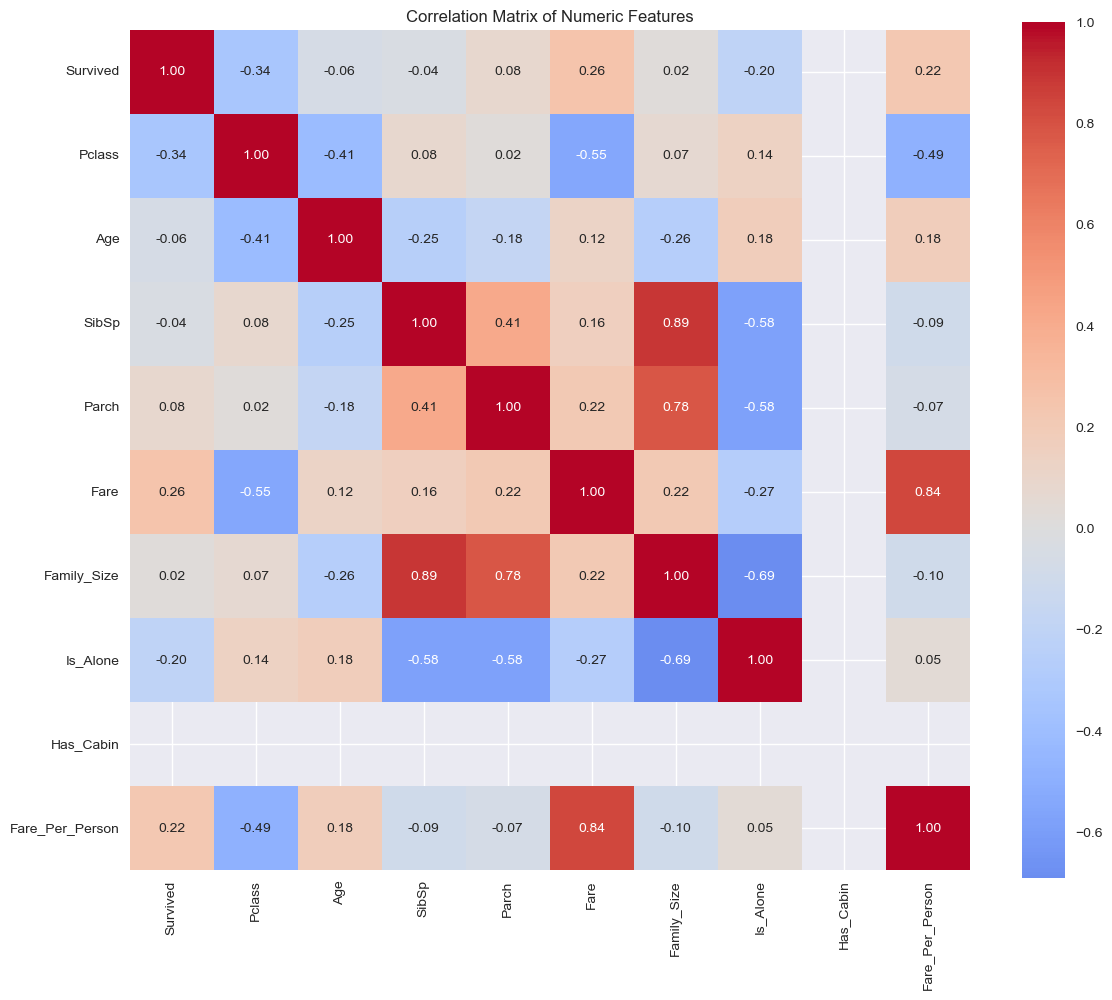

Key correlations with Survival:
Fare               0.257307
Fare_Per_Person    0.221600
Parch              0.081629
Family_Size        0.016639
SibSp             -0.035322
Age               -0.059579
Is_Alone          -0.203367
Pclass            -0.338481
Has_Cabin               NaN
Name: Survived, dtype: float64


In [70]:
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 
                'Family_Size', 'Is_Alone', 'Has_Cabin', 'Fare_Per_Person']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

print("Key correlations with Survival:")
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print(survival_corr[1:]) 

In [72]:
print("\n9. KEY INSIGHTS AND FINDINGS")
print("-" * 30)

insights = [
    "1. Overall survival rate was 38.4% - a tragic maritime disaster",
    "2. Gender was the strongest predictor - 'Women and children first' policy was evident",
    "3. Passenger class significantly affected survival - socioeconomic status mattered",
    "4. Age played a role - children had higher survival rates than adults",
    "5. Family size had an optimal range - very large families struggled, solo travelers also had lower rates",
    "6. Higher fares (indicating better accommodations) correlated with better survival",
    "7. Embarkation port mattered - Cherbourg passengers had better survival rates",
    "8. Having a cabin (vs. no cabin info) was associated with higher survival",
    "9. Passenger titles reflected social status and correlated with survival",
    "10. The combination of being female, first-class, and young was the best survival scenario"
]

for insight in insights:
    print(insight)


9. KEY INSIGHTS AND FINDINGS
------------------------------
1. Overall survival rate was 38.4% - a tragic maritime disaster
2. Gender was the strongest predictor - 'Women and children first' policy was evident
3. Passenger class significantly affected survival - socioeconomic status mattered
4. Age played a role - children had higher survival rates than adults
5. Family size had an optimal range - very large families struggled, solo travelers also had lower rates
6. Higher fares (indicating better accommodations) correlated with better survival
7. Embarkation port mattered - Cherbourg passengers had better survival rates
8. Having a cabin (vs. no cabin info) was associated with higher survival
9. Passenger titles reflected social status and correlated with survival
10. The combination of being female, first-class, and young was the best survival scenario
